# Introduction
Fill sth here whenever you are inspired.

In [3]:
%load_ext autoreload
%autoreload 2

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

## Example: Polynomial Curve Fitting
Assume that we have two real valued quantities $x, t \in \mathbb{R}$ that are related via some "map" that we are interested in "learning". We will generate artificial data for this example so that we already know the function that relates $t$ and $x$, for example: t = $\sin(2 \pi x)$ plus some random noise drawn from a normal distribution. In this case the variables $x,t \in [0,1]$.

Suppose that we are given $N$ samples (observations) of this relation between $x$ and $t$. This is, we are given a vector $\mathbf{X} = (x_1, x_2, \dots, x_N)^T$ together with $N$ observations of the target variable $\mathbf{t} = (t_1, t_2, \dots, t_N)^T$.

In [40]:
x = np.arange(0,1,0.05)
rand_noise = np.random.normal(0, 0.2, size = 20)
f = np.sin(2* np.pi *x)
t = f + rand_noise

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


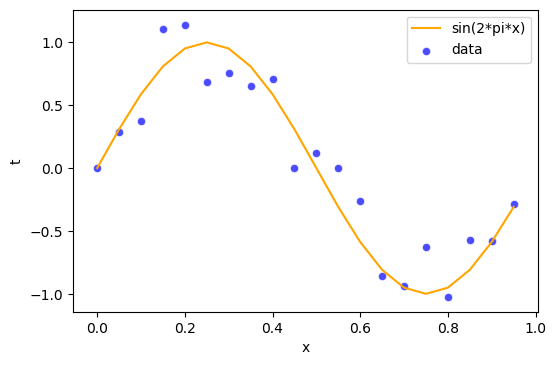

In [54]:
fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(x,t, ax = ax, color = 'blue', label = 'data', alpha = 0.7)
sns.lineplot(x, f, color = 'orange', label = 'sin(2*pi*x)')
ax.set_xlabel('x')
ax.set_ylabel('t')
fig.show()

Our goal is to use the observation data (training dataset) to make predictions about the target variable $t$. Such that we can return the value $\hat{t}$ for any observation new $\hat{x}$, new in the sense that it has not been seen by our "prediction method" whatever it is.

Our first approach will be a simple ploynomial fit. This means that we are going to fit data using a polynomial function of the form:
$$y(x, \vec{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_M x^M = \sum_{j=0}^{M}w_j x^j,$$

where $M$ is the order of the polynomial. Notice that this function is non-linear on the variable $x$ but is linear in the parameters $w$. Functions of this kind, that depend linearly on the unkwnon parameters are called **linear models**.

How to determine the values of these coefficients? Well, the answer to this question is the at the core of what we know as **Machine Learning**. The values of the coefficients $\vec{w}$ are going to be estimated by fitting the polynomial to the observations (training data), such that an **error function** is minimized. This error function should measure the misfit between the output of the function $y(x, \vec{w})$ and the actual observation (training data). One simple choice of such error function is given by the sum of the squares of the errors between predictions and observations, namely:
$$E(\vec{w}) = \dfrac{1}{2}\sum_{n=1}^{N}\left(y(x_n, \vec{w})- t_n\right)^2.$$

Note that $E(\vec{w}) = 0$ when $y(x_n, \vec{w}) = t_n$ for all $n$, this is, the error is null when the predictions coincide with the observations.

/usr/local/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


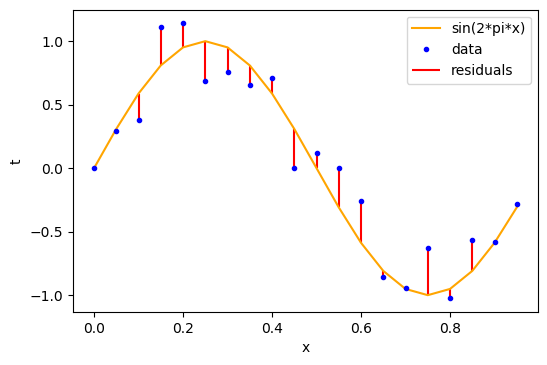

In [55]:
fig, ax = plt.subplots( dpi = 100)
ax.plot(x, f, '-', color = 'orange', label = 'sin(2*pi*x)')
ax.plot(x, t, '.', color = 'blue', label = 'data')
ax.vlines(x, f, t, 'red', label = 'residuals')
ax.legend(loc = 'best')
ax.set_xlabel('x')
ax.set_ylabel('t')
fig.show()

We wont dwelve into working the details of *least squares* approximation. The exact solution is, in general, known and there are at least two ways of obtaining it. One that uses the resources of calculus and the other that exploits geometrical observations about the problem to find the solution. We will see this in detail in the third notebook (probably).

Instead at this point we want to give a general overview of the central problem in *machine learning*, that of fitting a function to data in order to generalize the behavior, we will be more precise about this. To this intent, we will simply use the available resources to show how this works: [np.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

We will fit polynomials with degrees $1, 3, 9$ and $25$ to the artificial data we created using a sine function and some random noise. To gain intuition about what is known as *bias variance tradeoff* we will use the polynomial fit on test data that was **not necessarily** used to *tune* the parameters by solving the least square approximation.

In [146]:
def generate_dataset(size = 20, random_seed = 42):
    '''
    
    '''
    random.seed(random_seed)
    x = np.arange(0,1,1/size)
    rand_noise = np.random.normal(0, 0.2, size = size)
    y_true = np.sin(2* np.pi *x)
    y = y_true + rand_noise
    
    return x, y, y_true

In [187]:
X_train, y_train, y_train_true = generate_dataset()
X_test, y_test, y_test_true = generate_dataset(size = 100, random_seed = 666)


In [188]:
%%time
M = [1, 3, 9, 15] 
predictions = {str(m): [] for m in M}
models = {str(m): None for m in M}
for m in M:
    polynomial = np.poly1d(np.polyfit(X_train, y_train, deg = m))
    models[str(m)] = polynomial
    predictions[str(m)] = polynomial(X_test)

CPU times: user 877 µs, sys: 88 µs, total: 965 µs
Wall time: 943 µs


In [189]:
def plot_polynomial_fit(x, y, data, true_curve, data_label = 'data', pred_label = 'predictions', ax = None):
    '''
    
    '''
    if ax == None:
        fig, ax = plt.subplots(dpi = 120)
    ax.plot(x, y, '--', label = pred_label)
    ax.plot(x, true_curve, '-', color = 'orange', label = 'sin(2*pi*x)')
    ax.plot(x, data, '.', color = 'blue', label = data_label)
    ax.legend( fontsize = 7)
    return ax

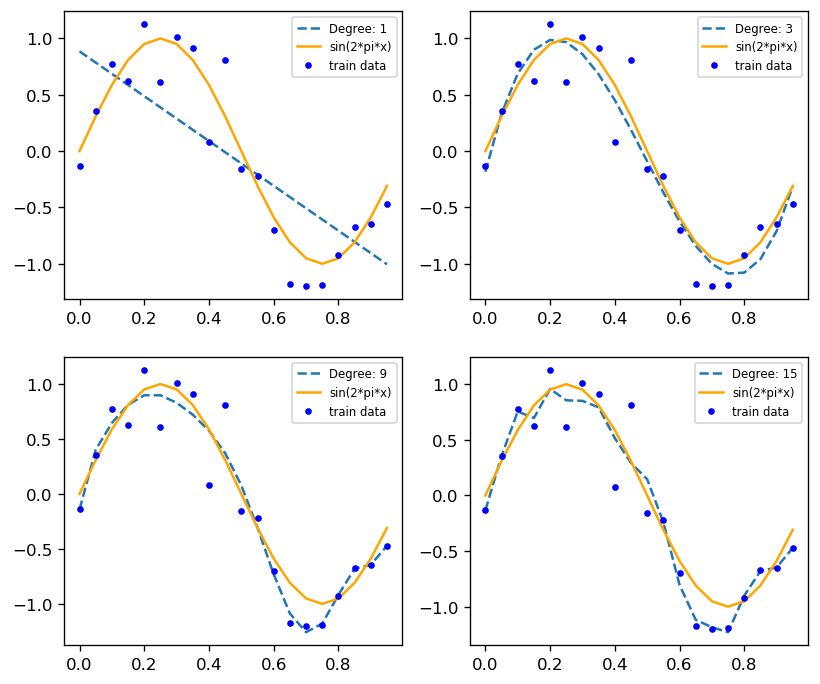

In [190]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_train, models[str(M[0])](X_train), 
                    y_train, y_train_true, 
                    data_label = 'train data',
                    pred_label = f'Degree: {M[0]}',
                    ax = ax[0,0])
plot_polynomial_fit(X_train, models[str(M[1])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[1]}',
                    data_label = 'train data',
                    ax = ax[0,1])
plot_polynomial_fit(X_train, models[str(M[2])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[2]}',
                    data_label = 'train data',
                    ax = ax[1,0])
plot_polynomial_fit(X_train, models[str(M[3])](X_train), 
                    y_train, y_train_true, 
                    pred_label = f'Degree: {M[3]}', 
                    data_label = 'train data',
                    ax = ax[1,1])


(-1.5, 1.5)

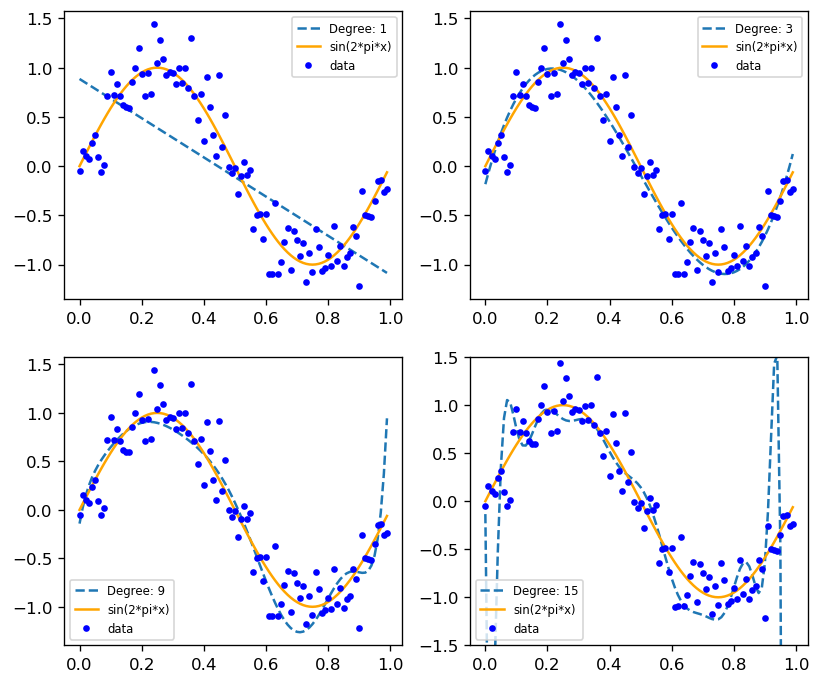

In [194]:
fig, ax = plt.subplots(2,2, dpi = 120, figsize = (8,7))
plot_polynomial_fit(X_test, predictions[str(M[0])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[0]}', ax = ax[0,0])
plot_polynomial_fit(X_test, predictions[str(M[1])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[1]}', ax = ax[0,1])
plot_polynomial_fit(X_test, predictions[str(M[2])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[2]}', ax = ax[1,0])
plot_polynomial_fit(X_test, predictions[str(M[3])], 
                    y_test, y_test_true, 
                    pred_label = f'Degree: {M[3]}', ax = ax[1,1])
ax[1,1].set_ylim(-1.5,1.5)

At this point it should have naturally arised the question of which of the models we are going to choose as our final estimative of the relation between the observations $(x, y)$ and the ground truth values $(x, \sin(2 \pi x))$. 

The above figures show that the polynomial fit with degree $=1$ is not a good estimative of the relation between the variables since it predicts a straight line that is no close to the real values of the sinusoidal curve. On the other hand we see that the higher degree polynomial fits tend to **overfit**, this is, they tend to aqcuire a very complex behavior in order to be as near as possible to the training target values `y_train`, this can be seen in the case of the degree 15 polynomial fit in the bottom right. In this case, it appears that the polynomial model with degree $3$ is the best estimative of the sinusoidal function, and we were able to see this because we knew the ground truth values of the function beforehand. Of course this is not the case in real life.

This fact is easier to see when we look at the actual prediction errors for each of the polynomial models.